# Debdas Ghosh
## deg107@pitt.edu

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import Ridge
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
from sklearn import neighbors
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics

## Part I: Linear Regression
Load the dataset 'HW_1_DATASET_DIRECT_MARKETING.csv' available on Piazza under "Homework Datasets"

In [2]:
dataset = pd.read_csv("HOMEWORK_1_DATASET_DIRECT_MARKETING.csv")
dataset.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304


### Question 1: Create a histogram for 'AmountSpent' & 'Salary'. Then describe the shape of both columns as discussed in Week 1 of class:

In [4]:
dataset.AmountSpent.describe()

count    1000.000000
mean     1216.770000
std       961.068613
min        38.000000
25%       488.250000
50%       962.000000
75%      1688.500000
max      6217.000000
Name: AmountSpent, dtype: float64

In [5]:
dataset.Salary.describe()

count      1000.000000
mean      56103.900000
std       30616.314826
min       10100.000000
25%       29975.000000
50%       53700.000000
75%       77025.000000
max      168800.000000
Name: Salary, dtype: float64

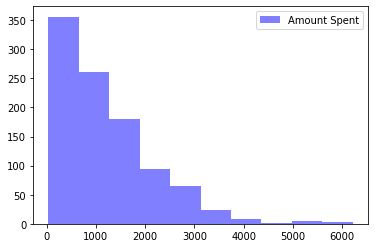

In [6]:
plt.hist(dataset['AmountSpent'],
         bins = 10,
         alpha=0.5, 
         color='blue',
        label = 'Amount Spent')

plt.legend(loc = 'upper right')
plt.show()

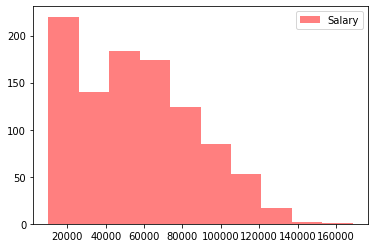

In [7]:
plt.hist(dataset['Salary'],
        bins = 10,
        alpha = 0.5,
        color = 'red',
        label = 'Salary')
plt.legend(loc = 'upper right')
plt.show()

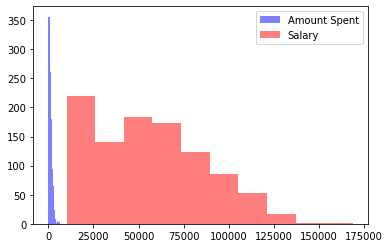

In [8]:
plt.hist(dataset['AmountSpent'],
         bins = 10,
         alpha=0.5, 
         color='blue',
        label = 'Amount Spent')

plt.hist(dataset['Salary'],
        bins = 10,
        alpha = 0.5,
        color = 'red',
        label = 'Salary')
plt.legend(loc = 'upper right')
plt.show()

Both of the columns are right skewed distributions with different scales

The data is highly skewed means there is a asymmetry of the probability distribution of a real-valued random variable about its mean which is against the statistical assumptions of multiple linear regression.

### Question #2: We are eventually going to predict 'AmountSpent'. The shape of 'Salary' and 'AmountSpent' go against one of the statistical assumptions of multiple linear regression. What is this statistical assumption? Transform the variables so it satisfies this assumption.

In [3]:
#dataset['AmountSpentTrnf'] = np.sqrt((dataset['AmountSpent']))
#dataset['SalaryTrnf'] = np.sqrt((dataset['Salary']))
dataset['AmountSpentTrnf'] = dataset['AmountSpent'] ** (1/3)
dataset['SalaryTrnf'] = dataset['Salary'] ** (1/3)

In [4]:
dataset.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,AmountSpentTrnf,SalaryTrnf
0,Old,Female,Own,Single,Far,47500,0,High,6,755,9.105748,36.215782
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,10.964070,39.916492
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,6.664444,23.811016
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,13.455270,44.071509
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,10.925111,40.896427


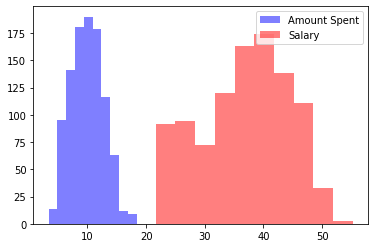

In [5]:
plt.hist(dataset['AmountSpentTrnf'],
         bins = 10,
         alpha=0.5, 
         color='blue',
        label = 'Amount Spent')

plt.hist(dataset['SalaryTrnf'],
        bins = 10,
        alpha = 0.5,
        color = 'red',
        label = 'Salary')
plt.legend(loc = 'upper right')
plt.show()

### Question 3: Now that 'Salary' is transormed, perform LASSO and Ridge multiple linear regression to predict 'AmountSpent'. Evaluate each model in terms of fit. Which model performs best? How did you find your alpha value? What are your alpha values for the ridge and LASSO model?

In [6]:
dataset.dtypes

Age                 object
Gender              object
OwnHome             object
Married             object
Location            object
Salary               int64
Children             int64
History             object
Catalogs             int64
AmountSpent          int64
AmountSpentTrnf    float64
SalaryTrnf         float64
dtype: object

In [7]:
dataset.shape

(1000, 12)

In [8]:
dataset.isnull().sum(axis = 0)

Age                  0
Gender               0
OwnHome              0
Married              0
Location             0
Salary               0
Children             0
History            303
Catalogs             0
AmountSpent          0
AmountSpentTrnf      0
SalaryTrnf           0
dtype: int64

In [9]:
dataset.drop(['History'],axis=1,inplace=True)

In [10]:
dataset.Age.unique()

array(['Old', 'Middle', 'Young'], dtype=object)

In [11]:
dataset.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [12]:
dataset.OwnHome.unique()

array(['Own', 'Rent'], dtype=object)

In [13]:
dataset.Married.unique()

array(['Single', 'Married'], dtype=object)

In [14]:
dataset.Location.unique()

array(['Far', 'Close'], dtype=object)

In [15]:
le = preprocessing.LabelEncoder()

In [16]:
le.fit(dataset['Age'])
list(le.classes_)

['Middle', 'Old', 'Young']

In [17]:
dataset['AgeLevel'] = le.transform(dataset['Age'])

In [18]:
le.fit(dataset['Gender'])
dataset['GenderLevel'] = le.transform(dataset['Gender'])

In [19]:
dataset.GenderLevel.unique()

array([0, 1], dtype=int64)

In [20]:
#df_marriage = pd.get_dummies(dataset['Married'])
#dataset = pd.concat([dataset, df_marriage], axis=1)

In [21]:
le.fit(dataset['OwnHome'])
dataset['OwnHomeLevel'] = le.transform(dataset['OwnHome'])

In [22]:
le.fit(dataset['Married'])
dataset['MarriedLevel'] = le.transform(dataset['Married'])

In [23]:
le.fit(dataset['Location'])
dataset['LocationLevel'] = le.transform(dataset['Location'])

In [24]:
dataset.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,Catalogs,AmountSpent,AmountSpentTrnf,SalaryTrnf,AgeLevel,GenderLevel,OwnHomeLevel,MarriedLevel,LocationLevel
0,Old,Female,Own,Single,Far,47500,0,6,755,9.105748,36.215782,1,0,0,1,1
1,Middle,Male,Rent,Single,Close,63600,0,6,1318,10.964070,39.916492,0,1,1,1,0
2,Young,Female,Rent,Single,Close,13500,0,18,296,6.664444,23.811016,2,0,1,1,0
3,Middle,Male,Own,Married,Close,85600,1,18,2436,13.455270,44.071509,0,1,0,0,0
4,Middle,Female,Own,Single,Close,68400,0,12,1304,10.925111,40.896427,0,0,0,1,0


In [25]:
dataset.dtypes

Age                 object
Gender              object
OwnHome             object
Married             object
Location            object
Salary               int64
Children             int64
Catalogs             int64
AmountSpent          int64
AmountSpentTrnf    float64
SalaryTrnf         float64
AgeLevel             int32
GenderLevel          int32
OwnHomeLevel         int32
MarriedLevel         int32
LocationLevel        int32
dtype: object

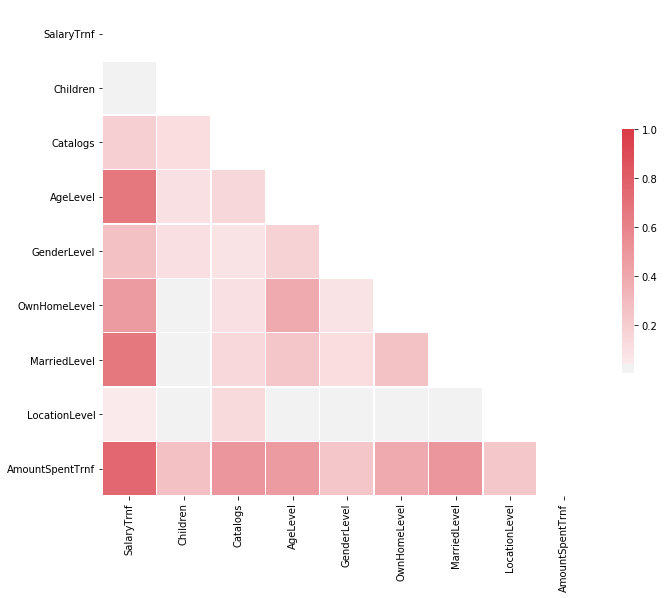

In [26]:
dataset_float_vars = dataset[['SalaryTrnf', 'Children', 'Catalogs', 'AgeLevel', 'GenderLevel', 'OwnHomeLevel', 'MarriedLevel', 'LocationLevel', 'AmountSpentTrnf']]

corr_matrix = dataset_float_vars.corr().abs()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Select the upper part of the triangle
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [27]:
corr_matrix

,SalaryTrnf,Children,Catalogs,AgeLevel,GenderLevel,OwnHomeLevel,MarriedLevel,LocationLevel,AmountSpentTrnf
SalaryTrnf,1.000000,0.033026,0.194633,0.666617,0.274572,0.473607,0.670535,0.041786,0.754354
Children,0.033026,1.000000,0.113455,0.103129,0.105469,0.032274,0.009770,0.002391,0.273501
Catalogs,0.194633,0.113455,1.000000,0.149226,0.087351,0.093132,0.137060,0.128581,0.501550
AgeLevel,0.666617,0.103129,0.149226,1.000000,0.177891,0.391409,0.238616,0.041050,0.473966
GenderLevel,0.274572,0.105469,0.087351,0.177891,1.000000,0.084433,0.116057,0.005554,0.242579
OwnHomeLevel,0.473607,0.032274,0.093132,0.391409,0.084433,1.000000,0.264009,0.033691,0.385547
MarriedLevel,0.670535,0.009770,0.137060,0.238616,0.116057,0.264009,1.000000,0.006964,0.505941
LocationLevel,0.041786,0.002391,0.128581,0.041050,0.005554,0.033691,0.006964,1.000000,0.234458
AmountSpentTrnf,0.754354,0.273501,0.501550,0.473966,0.242579,0.385547,0.505941,0.234458,1.000000


In [28]:
dataset_vars = dataset[['SalaryTrnf', 'Children', 'Catalogs', 'AgeLevel', 'GenderLevel', 'OwnHomeLevel', 'MarriedLevel', 'LocationLevel']]
target = dataset[['AmountSpentTrnf']]

In [29]:
# Create an SelectKBest object to select features with two best ANOVA F-Values
fvalue_selector = SelectKBest(f_regression, k=8)

In [30]:
X_kbest = fvalue_selector.fit_transform(dataset_vars, target)

C:\Users\debda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
# Show results
print('Original number of features:', dataset_vars.shape[1])
print('Reduced number of features:', X_kbest.shape[1])

Original number of features: 8
Reduced number of features: 8


In [32]:
# We can convert X_kbest to a dataframe
X_kbest = pd.DataFrame(X_kbest)
X_kbest.head()

,0,1,2,3,4,5,6,7
0,36.215782,0.0,6.0,1.0,0.0,0.0,1.0,1.0
1,39.916492,0.0,6.0,0.0,1.0,1.0,1.0,0.0
2,23.811016,0.0,18.0,2.0,0.0,1.0,1.0,0.0
3,44.071509,1.0,18.0,0.0,1.0,0.0,0.0,0.0
4,40.896427,0.0,12.0,0.0,0.0,0.0,1.0,0.0


In [33]:
kBestFeatures = dataset[['SalaryTrnf', 'Children', 'Catalogs', 'AgeLevel', 'GenderLevel', 'OwnHomeLevel', 'MarriedLevel', 'LocationLevel']]

In [34]:
target = dataset[['AmountSpentTrnf']]

In [35]:
scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(scaler.fit_transform(kBestFeatures), 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=1
                                                   )

#### Lasso

In [36]:
# Create lasso regression with alpha value
regr = Lasso(alpha=0.025)

In [37]:
# Fit the lasso regression
lasso_model = regr.fit(x_train, y_train)

In [38]:
lasso_model

Lasso(alpha=0.025, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [39]:
print(lasso_model.coef_, lasso_model.intercept_)

[ 1.89287406 -0.75208523  0.80509124  0.          0.         -0.04525568
  0.          0.58131479] [9.93966158]


In [40]:
lasso_model.score(x_train,y_train)

0.8157172840942443

In [41]:
lasso_model.score(x_test,y_test)

0.8110727143011502

In [42]:
# To find the best hyperparameter, we should use grid-search.
# We can do this for LASSO with LASSO CV

In [43]:
lasso_cv = LassoCV(alphas = [0.001, 0.005, 0.01, 0.02, 0.025, 0.03, 0.1, 1 ])

In [44]:
# Fit the lasso regression
model_cv = lasso_cv.fit(x_train, y_train)

C:\Users\debda\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\debda\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [45]:
# To find the best alpha: 
model_cv.alpha_

0.025

#### Ridge

In [46]:
ridge = Ridge()

In [47]:
parameters = {'alpha': 10** np.arange(-30,30, dtype=float)}
parameters

{'alpha': array([1.e-30, 1.e-29, 1.e-28, 1.e-27, 1.e-26, 1.e-25, 1.e-24, 1.e-23,
        1.e-22, 1.e-21, 1.e-20, 1.e-19, 1.e-18, 1.e-17, 1.e-16, 1.e-15,
        1.e-14, 1.e-13, 1.e-12, 1.e-11, 1.e-10, 1.e-09, 1.e-08, 1.e-07,
        1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
        1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08, 1.e+09,
        1.e+10, 1.e+11, 1.e+12, 1.e+13, 1.e+14, 1.e+15, 1.e+16, 1.e+17,
        1.e+18, 1.e+19, 1.e+20, 1.e+21, 1.e+22, 1.e+23, 1.e+24, 1.e+25,
        1.e+26, 1.e+27, 1.e+28, 1.e+29])}

In [48]:
ridge_regressor = GridSearchCV (ridge, parameters, cv = 10)
ridge_regressor.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.e-30, 1.e-29, 1.e-28, 1.e-27, 1.e-26, 1.e-25, 1.e-24, 1.e-23,
       1.e-22, 1.e-21, 1.e-20, 1.e-19, 1.e-18, 1.e-17, 1.e-16, 1.e-15,
       1.e-14,...e-08, 1.e-07,
       1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08, 1.e+09,
       1.e+10, 1.e+11, 1.e+12, 1.e+13, 1.e+14, 1.e+15, 1.e+16, 1.e+17,
       1.e+18, 1.e+19, 1.e+20, 1.e+21, 1.e+22, 1.e+23, 1.e+24, 1.e+25,
       1.e+26, 1.e+27, 1.e+28, 1.e+29])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [49]:
ridge_regressor.best_estimator_

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [50]:
ridge_regressor.best_params_

{'alpha': 0.1}

In [51]:
ridge_regressor.best_score_

0.8090921299261215

In [52]:
ridge_regressor.score(x_test,y_test)

0.8127036455114696

### Question #4: Plot the fitted values of your best model and the residuals. Is there a pattern between these points?

In [53]:
test_predict = ridge_regressor.predict(x_test)
train_predict = ridge_regressor.predict(x_train)

In [54]:
train_residuals = y_train - train_predict
test_residuals = y_test - test_predict

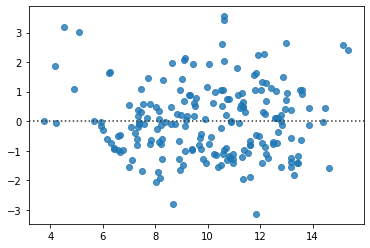

In [57]:
sns.residplot(test_predict,test_residuals)
plt.show()

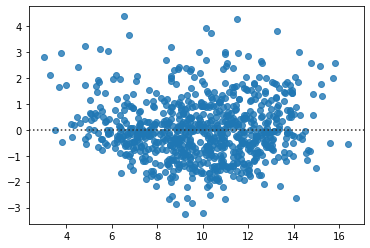

In [58]:
sns.residplot(train_predict, train_residuals)
plt.show()

There is a pattern between these points. Points are normally distributed.

## Part II: Classification:
Load the dataset 'HW_1_flight_delays.txt' available on Piazza

In [59]:
flight_data = pd.read_csv('flight_delays.txt')

### Question #5: What is the balance of the "delay" column? Show a count of the on-time vs. late flights.

In [60]:
flight_data['delay'].value_counts().to_dict()

{'ontime': 1773, 'delayed': 428}

Ontime : 80.55 %

Delayed : 19.45 %

Unbalanced data

### Question #6: Perform logistic regression to predict flight delays. Implement elastic-net for variable selection. Which L1 ratio did you choose?

In [61]:
flight_data.dtypes

Unnamed: 0       int64
schedtime        int64
carrier         object
deptime          int64
dest            object
distance         int64
date            object
flightnumber     int64
origin          object
weather          int64
dayweek          int64
daymonth         int64
tailnu          object
delay           object
dtype: object

In [62]:
flight_data.head()

,Unnamed: 0,schedtime,carrier,deptime,dest,distance,date,flightnumber,origin,weather,dayweek,daymonth,tailnu,delay
0,1,1455,OH,1455,JFK,184,1/1/2004,5935,BWI,0,4,1,N940CA,ontime
1,2,1640,DH,1640,JFK,213,1/1/2004,6155,DCA,0,4,1,N405FJ,ontime
2,3,1245,DH,1245,LGA,229,1/1/2004,7208,IAD,0,4,1,N695BR,ontime
3,4,1715,DH,1709,LGA,229,1/1/2004,7215,IAD,0,4,1,N662BR,ontime
4,5,1039,DH,1035,LGA,229,1/1/2004,7792,IAD,0,4,1,N698BR,ontime


In [63]:
flight_data.carrier.unique()

array(['OH', 'DH', 'DL', 'MQ', 'UA', 'US', 'RU', 'CO'], dtype=object)

In [64]:
flight_data.dest.unique()

array(['JFK', 'LGA', 'EWR'], dtype=object)

In [65]:
flight_data.origin.unique()

array(['BWI', 'DCA', 'IAD'], dtype=object)

In [66]:
flight_data.delay.unique()

array(['ontime', 'delayed'], dtype=object)

In [67]:
le.fit(flight_data['delay'])
flight_data['delayLabelled'] = le.transform(flight_data['delay'])

In [68]:
le.fit(flight_data['carrier'])
flight_data['carrierLabelled'] = le.transform(flight_data['carrier'])

In [69]:
le.fit(flight_data['dest'])
flight_data['destLabelled'] = le.transform(flight_data['dest'])

In [70]:
le.fit(flight_data['origin'])
flight_data['originLabelled'] = le.transform(flight_data['origin'])

In [71]:
flight_data.isnull().sum(axis = 0) #axis = 0 to check null value column-wise

Unnamed: 0         0
schedtime          0
carrier            0
deptime            0
dest               0
distance           0
date               0
flightnumber       0
origin             0
weather            0
dayweek            0
daymonth           0
tailnu             0
delay              0
delayLabelled      0
carrierLabelled    0
destLabelled       0
originLabelled     0
dtype: int64

In [72]:
flight_data_vars = flight_data[['schedtime','carrierLabelled','deptime','destLabelled','distance', 'flightnumber',
                                                'originLabelled','weather','dayweek','daymonth']]
flight_data_target = flight_data[['delayLabelled']]

In [73]:
x_trainFlight, x_testFlight, y_trainFlight, y_testFlight = train_test_split(scaler.fit_transform(flight_data_vars), 
                                                    flight_data_target, 
                                                    test_size=0.2, 
                                                    random_state=1
                                                   )

In [74]:
# let's perform logistic regressino using elastic-net
clf = LogisticRegressionCV(solver = 'saga',
                           penalty = 'elasticnet',
                           l1_ratios = [0.001, 0.01, 0.1, 0.2, 0.3],
                           Cs = 100,
                           n_jobs = -1,
                           random_state = 0
)

In [75]:
lg_model = clf.fit(x_trainFlight, y_trainFlight)

lg_model.score(x_trainFlight, y_trainFlight)

C:\Users\debda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\debda\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\debda\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\debda\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\debda\Anaconda3\lib\site-packages\sklearn\linear_

0.8943181818181818

In [76]:
lg_model.score(x_testFlight, y_testFlight)

0.8934240362811792

In [77]:
lg_model.l1_ratio_

array([0.001])

L1 Ratio chosen: 0.001

### Question #7: Create ROC curves for your train and test sets. Do you feel that the model is over or underfit? What are the AUC's?

In [78]:
# calculate the fpr and tpr for all thresholds of the classification
probs = lg_model.predict_proba(x_testFlight)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_testFlight, preds)
roc_auc = metrics.auc(fpr, tpr)

In [79]:
# calculate the fpr and tpr for all thresholds of the classification
probs_train = lg_model.predict_proba(x_trainFlight)
preds_train = probs_train[:,1]
fpr_train, tpr_train, threshold_train = metrics.roc_curve(y_trainFlight, preds_train)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

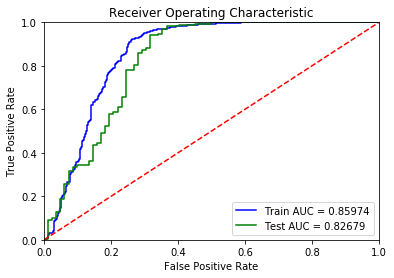

In [80]:
plt.title('Receiver Operating Characteristic')
#plt.plot(fpr_train, tpr_train, 'b', label = 'AUC = %0.2f' % roc_auc_train)
plt.plot(fpr_train, tpr_train, 'b', label = 'Train AUC = %0.5f' % roc_auc_train)
plt.plot(fpr, tpr, 'g', label = 'Test AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The model is overfit, since Train AUC > Test AUC

Train AUC : 0.85974

Test AUC : 0.82679

### Question 8: Decide on a threshold to classify flights in your test set as "on time", or "delayed". Create a confusion matrix. What is your:
- Sensitivity
- Specificity
- PPV
- NPV
- F1 score
- Accuracy


In [81]:
# default threshold is 0.5
predictions = lg_model.predict(x_testFlight)

In [82]:
pd.crosstab(y_testFlight['delayLabelled'], predictions,
            rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,35,47,82
1,0,359,359
All,35,406,441


In [83]:
TP = 359
TN = 35
FP = 47
FN = 0

In [84]:
Sensitivity = TP / (TP + FN)
Sensitivity

1.0

In [85]:
Specificity = TN / (TN + FP)
Specificity

0.4268292682926829

In [86]:
# Precision / Positive Predicted Value
PPV = TP / (TP + FP)
PPV

0.8842364532019704

In [87]:
# Negative Predicted Value
NPV = TN / (TN + FN)
NPV

1.0

In [88]:
F1_score = (2 * PPV * Sensitivity) / (PPV + Sensitivity)
F1_score

0.938562091503268

In [89]:
Accuracy = (TP + TN) / (TP + TN + FP + FN)
Accuracy

0.8934240362811792

### Question #9: Perform KNN on the same dataset to predict flight delays. Plot the AUC for KNN on your test set and cite the AUC. How does it perform in comparison to your logistic regression model? Better or worse in terms of AUC?

In [90]:
knn_clf = neighbors.KNeighborsClassifier(4, weights = 'uniform')

In [91]:
knn_model = knn_clf.fit(x_trainFlight, y_trainFlight)

C:\Users\debda\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [92]:
knn_model.score(x_trainFlight, y_trainFlight)

0.8607954545454546

In [93]:
knn_model.score(x_testFlight, y_testFlight)

0.7755102040816326

In [94]:
knn_probs_train = knn_model.predict_proba(x_trainFlight)
knn_probs_test = knn_model.predict_proba(x_testFlight)

In [95]:
preds_knn = knn_probs_test[:,1]
fpr_knn, tpr_knn, threshold_knn = metrics.roc_curve(y_testFlight, preds)
roc_auc_knn = metrics.auc(fpr_knn, tpr_knn)

In [96]:
# calculate the fpr and tpr for all thresholds of the classification
preds_knn_train = knn_probs_train[:,1]
fpr_knn_train, tpr_knn_train, threshold_knn_train = metrics.roc_curve(y_trainFlight, preds_train)
roc_auc_knn_train = metrics.auc(fpr_knn_train, tpr_knn_train)

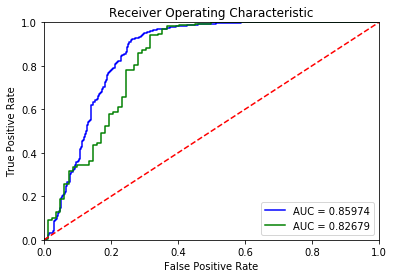

In [97]:
plt.title('Receiver Operating Characteristic')
#plt.plot(fpr_train, tpr_train, 'b', label = 'AUC = %0.2f' % roc_auc_train)
plt.plot(fpr_knn_train, tpr_knn_train, 'b', label = 'AUC = %0.5f' % roc_auc_knn_train)
plt.plot(fpr_knn, tpr_knn, 'g', label = 'AUC = %0.5f' % roc_auc_knn)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

AUCs of both the models for test set are same.